In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px


Reading csv data with Pandas library

In [2]:
df=pd.read_csv('../Data/train.csv')
df_test= pd.read_csv('../Data/test.csv')

Remove unwanted column

In [3]:
df=df.iloc[:,1:]
df_test=df_test.iloc[:,1:]

Explore data

In [6]:
df_test.head()

,x1,x2,y
0,2.316800,2.899064,61.172216
1,2.023726,2.141243,29.149661
2,2.483548,2.813282,61.751701
3,2.058335,2.994136,57.970753
4,2.681823,2.869835,69.389524


In [7]:
df.head()

,x1,x2,y
0,1.543500,0.718659,2.504393
1,1.721699,1.761218,16.777724
2,1.029734,0.946516,2.898218
3,1.874671,1.921898,21.753827
4,1.914601,1.017112,6.222516


In [8]:
print("The shape of train.csv :"+str(df.shape))

print("The shape of test.csv :"+str(df_test.shape))

The shape of train.csv :(9999, 3)
The shape of test.csv :(99, 3)


In [9]:
df.describe()

,x1,x2,y
count,9999.000000,9999.000000,9999.000000
mean,1.254987,1.240495,6.802592
std,0.434357,0.437067,5.145863
min,0.500276,0.500349,0.409952
25%,0.877843,0.859612,2.633788
50%,1.257325,1.230718,5.399104
75%,1.637378,1.617182,9.644745
max,1.999694,1.999858,24.888137


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      9999 non-null   float64
 1   x2      9999 non-null   float64
 2   y       9999 non-null   float64
dtypes: float64(3)
memory usage: 234.5 KB


In [11]:
df_test.describe()

,x1,x2,y
count,99.000000,99.000000,99.000000
mean,2.529453,2.537210,51.853812
std,0.273708,0.303069,13.202425
min,2.022688,2.005927,26.615201
25%,2.321216,2.313501,40.555725
50%,2.517855,2.574454,52.256939
75%,2.773108,2.805113,60.926427
max,2.985324,2.994136,78.830809


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      99 non-null     float64
 1   x2      99 non-null     float64
 2   y       99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


<AxesSubplot:>

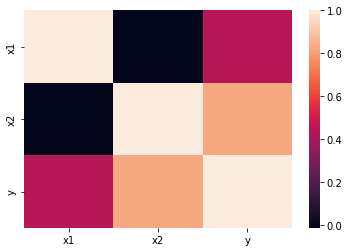

In [13]:
sns.heatmap(df.corr())

Import libraries used for machine learning

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

Scale data with different method

In [76]:
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()

Fit and transform data

In [11]:
# df_trans = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_trans = pd.DataFrame(scaler1.transform(df),columns=df.columns)

In [25]:
df_trans.head()

,x1,x2,y
0,0.695753,0.145588,0.085564
1,0.814598,0.840854,0.668668
2,0.353109,0.297542,0.101652
3,0.916619,0.948010,0.871955
4,0.943250,0.344622,0.237459


In [8]:
df_trans_test=pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

In [9]:
df_trans_test.head()

,x1,x2,y
0,1.211487,1.599667,2.482303
1,1.016028,1.094287,1.174095
2,1.322695,1.542460,2.505976
3,1.039110,1.663068,2.351514
4,1.454929,1.580174,2.818002


In [12]:
X_train=df_trans[['x1','x2']].values
y_train=df_trans['y']

Initialize model

In [13]:
regressor = LinearRegression()  

Train model

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
x_test=df_trans_test[['x1','x2']] 

In [16]:
y_pred =  regressor.predict(x_test)

/home/mark/Documents/Involve Asia/.venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
df_res = pd.DataFrame({'Actual': df_trans_test['y'], 'Predicted': y_pred.flatten()})

In [ ]:
df_res.head()

Min-Max Scaler Result

In [17]:
score=metrics.r2_score(df_trans_test['y'],y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is',metrics.mean_squared_error(df_trans_test['y'],y_pred))
print('root_mean_squared error of is ',np.sqrt(metrics.mean_squared_error(df_trans_test['y'],y_pred)))

r2 socre is -3.3019325013772036
mean_sqrd_error is 1.2388064121740012
root_mean_squared error of is  1.1130168067796646


Z-score Scaler

In [66]:
score=metrics.r2_score(df_trans_test['y'],y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is',metrics.mean_squared_error(df_trans_test['y'],y_pred))
print('root_mean_squared error of is ',np.sqrt(metrics.mean_squared_error(df_trans_test['y'],y_pred)))

r2 socre is -3.301932501377207
mean_sqrd_error is 28.034244633471065
root_mean_squared error of is  5.294737447076207


Robust Scaler

In [50]:
score=metrics.r2_score(df_trans_test['y'],y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is',metrics.mean_squared_error(df_trans_test['y'],y_pred))
print('root_mean_squared error of is ',np.sqrt(metrics.mean_squared_error(df_trans_test['y'],y_pred)))

r2 socre is -3.3019325013772036
mean_sqrd_error is 15.101057890416284
root_mean_squared error of is  3.8860079632466378


In [6]:
import joblib

In [85]:
joblib.dump(scaler, "model_save/scaler.gz") 

['model_save/scaler.gz']

In [7]:
scaler1=joblib.load("model_save/scaler.gz")

In [90]:
joblib.dump(regressor, "model_save/model.pkl")

['model_save/model.pkl']

In [91]:
model = joblib.load("model_save/model.pkl")

Linear Regression with Min Max Scaler has the best result among the other data normalization technique.

The RMSE score for Min Max Scaler is 1.113 while the other are 5.294 and 3.886 for Z-score method and Robust method.